In [1]:
#Contextual-compression

**Contextual compression** is an advanced technique in document retrieval that focuses on enhancing the relevance and conciseness of retrieved information. By utilizing language models, it compresses and extracts only the most pertinent sections of documents in response to a query, making the retrieval process more efficient and context-aware.

**How It Overcomes Traditional Methods:** Traditional document retrieval systems often retrieve entire documents or large sections, including irrelevant information. This can lead to inefficiency and information overload. Contextual compression addresses this by selectively extracting the most relevant parts of a document, filtering out unnecessary content and delivering more precise answers.

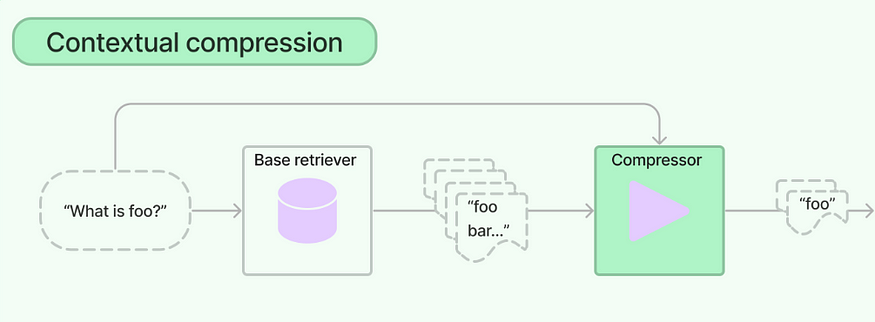

In [ ]:
# Import libraries
import os
import sys
from dotenv import load_dotenv
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.retrievers import ContextualCompressionRetriever
from langchain.chains import RetrievalQA
from ollama import Ollama  # Import the Ollama library

# Set path for helper functions and evaluation (assuming these are custom functions you've defined)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) 

# Load environment variables from a .env file
load_dotenv()

# Define document's path
path = "sample.pdf"

# Initialize Ollama model (assuming this is the interface to interact with the model locally)
ollama_model = Ollama(model_name="ollama-model", max_tokens=4000)

# Function to encode PDF into a vector store (this would be custom-defined)
vector_store = encode_pdf(path)

# Create a retriever
retriever = vector_store.as_retriever()

# Create a contextual compressor using the Ollama model
compressor = LLMChainExtractor.from_llm(ollama_model)

# Combine the retriever with the compressor
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=retriever
)

# Create a QA chain with the compressed retriever
qa_chain = RetrievalQA.from_chain_type(
    llm=ollama_model,
    retriever=compression_retriever,
    return_source_documents=True
)

# Example usage with a more relevant generative AI query
query = "Explain how generative AI can be used in text summarization."
result = qa_chain.invoke({"query": query})

# Print the result and source documents
print(result["result"])
print("Source documents:", result["source_documents"])

**Benefits:**

**Improved Relevance:** Provides only the most relevant information, reducing noise.

**Increased Efficiency:** Reduces the amount of text processed, saving computational resources.
**Enhanced Context Understanding:**The system better understands and responds to the query's context.

**Flexibility:** Easily adaptable to different documents and queries, making it versatile across various domains.

This approach offers a powerful enhancement over traditional retrieval systems, particularly in scenarios requiring quick, accurate, and contextually relevant information from large document collections.